<a href="https://colab.research.google.com/github/tejaswishetty17/Agentic-AI/blob/main/Natural_Language_to_SQL_Query.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 **Natural Language to SQL Query using Agentic AI**


In this notebook, we explore a basic agentic workflow where a language model understands a natural language question and autonomously generates the corresponding SQL query to fetch the desired answer from a database.

Instead of manually writing SQL for every question, we use an Agent powered by LangChain to:

Parse the intent from the natural language question

Formulate the appropriate SQL query

Execute the query on a sample database

Return the correct result to the user

This approach demonstrates how Large Language Models (LLMs) can be used not just for generation, but also as reasoning agents in practical data applications.



>📘 This notebook serves as a learning resource for anyone interested in the intersection of LLMs, databases, and automation—especially for building intelligent data assistants or low-code query tools.


user gives the query -> LLM -> get the schema (tool) -> LLM generates SQL query -> execute sql(tool) -> LLM presents the final output.

In [ ]:
pip install -q langchain_openai langgraph langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.4 MB/s eta 0:00:00


In [ ]:
import sqlite3

conn = sqlite3.connect("shop.db", check_same_thread = False)

In [ ]:
# Create users table
conn.execute('''
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT,
    signup_date DATE
)
''')

# Create orders table
conn.execute('''
CREATE TABLE IF NOT EXISTS orders (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    amount REAL,
    status TEXT,
    order_date DATE,
    FOREIGN KEY(user_id) REFERENCES users(id)
)
''')

# Insert users
conn.execute("INSERT INTO users VALUES (1, 'Alice', 'alice@example.com', '2024-01-10')")
conn.execute("INSERT INTO users VALUES (2, 'Bob', 'bob@example.com', '2024-03-15')")
conn.execute("INSERT INTO users VALUES (3, 'Charlie', 'charlie@example.com', '2024-03-22')")
conn.execute("INSERT INTO users VALUES (4, 'Diana', 'diana@example.com', '2024-04-05')")
conn.execute("INSERT INTO users VALUES (5, 'Eve', 'eve@example.com', '2024-04-25')")
conn.execute("INSERT INTO users VALUES (6, 'Frank', 'frank@example.com', '2024-05-15')")
conn.execute("INSERT INTO users VALUES (7, 'Grace', 'grace@example.com', '2024-05-18')")
conn.execute("INSERT INTO users VALUES (8, 'Henry', 'henry@example.com', '2024-05-20')")
conn.execute("INSERT INTO users VALUES (9, 'Ivy', 'ivy@example.com', '2024-06-01')")
conn.execute("INSERT INTO users VALUES (10, 'Jack', 'jack@example.com', '2024-06-05')")
conn.execute("INSERT INTO users VALUES (11, 'Kiran', 'kiran@example.com', '2024-06-03')")
conn.execute("INSERT INTO users VALUES (12, 'Lata', 'lata@example.com', '2024-06-04')")
conn.execute("INSERT INTO users VALUES (13, 'Manoj', 'manoj@example.com', '2024-06-06')")

# Insert orders
conn.execute("INSERT INTO orders VALUES (1, 1, 250.00, 'completed', '2024-03-10')")
conn.execute("INSERT INTO orders VALUES (2, 2, 100.00, 'pending', '2024-03-16')")
conn.execute("INSERT INTO orders VALUES (3, 3, 320.00, 'completed', '2024-03-24')")
conn.execute("INSERT INTO orders VALUES (4, 4, 180.00, 'completed', '2024-05-01')")
conn.execute("INSERT INTO orders VALUES (5, 5, 210.00, 'completed', '2024-05-02')")
conn.execute("INSERT INTO orders VALUES (6, 1, 180.00, 'completed', '2024-03-18')")
conn.execute("INSERT INTO orders VALUES (7, 2, 120.00, 'completed', '2024-03-20')")
conn.execute("INSERT INTO orders VALUES (8, 1, 300.00, 'completed', '2024-04-01')")
conn.execute("INSERT INTO orders VALUES (9, 3, 80.00, 'cancelled', '2024-04-10')")
conn.execute("INSERT INTO orders VALUES (10, 4, 250.00, 'pending', '2024-05-05')")
conn.execute("INSERT INTO orders VALUES (11, 6, 400.00, 'completed', '2024-05-20')")
conn.execute("INSERT INTO orders VALUES (12, 7, 320.00, 'completed', '2024-05-22')")
conn.execute("INSERT INTO orders VALUES (13, 8, 150.00, 'pending', '2024-05-25')")
conn.execute("INSERT INTO orders VALUES (14, 9, 220.00, 'completed', '2024-06-02')")
conn.execute("INSERT INTO orders VALUES (15, 10, 500.00, 'completed', '2024-06-06')")

In [ ]:
conn.commit()

In [ ]:
rows = conn.execute(f"PRAGMA table_info(orders)").fetchall()
cols = "".join([f"{i[0], i[1]}" for i in rows])
cols

"(0, 'id')(1, 'user_id')(2, 'amount')(3, 'status')(4, 'order_date')"

In [ ]:
from langchain.agents import tool

@tool
def get_schema() -> str:
  """Return table schemas from the SQLite database"""
  schema = ""
  for table in ["users","orders"]:
    rows = conn.execute(f"PRAGMA table_info({table})").fetchall()
    cols = ",".join([f"{r[1]} {r[2]}" for r in rows])
    schema = schema + f"{table}({cols})\n"
  return schema.strip()

@tool
def execute_sql(query:str)->str:
  """Execute SQL query on the database and return the result"""
  try:
    result = conn.execute(query).fetchall()
    return str(result)
  except Exception as e:
    return f"Error: {str(e)}"


In [ ]:
from langgraph.graph import StateGraph, END
from langgraph.graph.message import AnyMessage, add_messages
from langgraph.prebuilt import ToolNode, create_react_agent
from langchain_openai import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.prebuilt import tools_condition
from langchain.schema import AIMessage
import os

#Add your OPEN AI KEY
os.environ["OPENAI_API_KEY"] = ""
llm = ChatOpenAI(model = "gpt-4o-mini", temperature=0)

import os
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_ENDPOINT"]="https://api.smith.langchain.com"
#Add your LANGCHAIN KEY
os.environ["LANGCHAIN_API_KEY"]=""
os.environ["LANGCHAIN_PROJECT"]="RAG_ADVANCED"

from langsmith import utils
utils.tracing_is_enabled()

True

In [ ]:
#Bind the tools to LLM
tools = [get_schema, execute_sql]
llm_with_tools = llm.bind_tools(tools)


class AgentState(TypedDict):
  messages: Annotated[list[AnyMessage], add_messages]

#node
def agent(state: AgentState)->AgentState:
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [ ]:
builder = StateGraph(AgentState)
builder.add_node("agent", agent)
builder.add_node("tools", ToolNode(tools))

builder.set_entry_point("agent")
builder.add_conditional_edges("agent", tools_condition)
builder.add_edge("tools", "agent")

app = builder.compile()

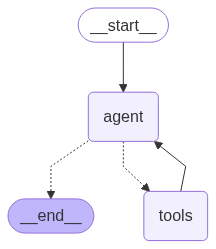

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
input = {"messages": [{"role":"user", "content":"how many users didnt make any purchase, list down the user ids"}]}
result = app.invoke(input)

print(result['messages'])

[HumanMessage(content='how many users didnt make any purchase, list down the user ids', additional_kwargs={}, response_metadata={}, id='d161760e-3a85-43b7-a5dd-36b3ec2a3ca3'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2fIDNmfs6Kn8E9qjT1s4bsSS', 'function': {'arguments': '{}', 'name': 'get_schema'}, 'type': 'function'}, {'id': 'call_WoXwYuN1bKlVaOa5RcqvaI2K', 'function': {'arguments': '{"query": "SELECT user_id FROM users WHERE user_id NOT IN (SELECT DISTINCT user_id FROM purchases);"}', 'name': 'execute_sql'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 77, 'total_tokens': 135, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BixqB7AxbFnpvg

In [ ]:
print(result['messages'][-1].content)

There are 3 users who didn't make any purchases. Their user IDs are:

- 11
- 12
- 13


In [ ]:
input = {"messages": [{"role":"user", "content":"whats the average amount of sales value for each user"}]}


for output in app.stream(input):
  for key, value in output.items():
    print(f"\n Node '{key}':")
    print(value["messages"])
    print("\n\n",value['messages'][-1].content)


 Node 'agent':
[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_aq1oFWn39FoRj8HK61z2AtNO', 'function': {'arguments': '{"query":"SELECT user_id, AVG(sales_value) AS average_sales_value FROM sales GROUP BY user_id;"}', 'name': 'execute_sql'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 75, 'total_tokens': 108, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BixuYWMOM8BDkK4pHdKdIM7cCzcU8', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7fab2ee3-3c4e-4948-bd45-a3431c1fc872-0', tool_calls=[{'name': 'execute_sql', 'args': {'query': 'SELECT user_id, AVG(sales_value) AS average_sales_value FROM sales GROUP BY user